**Objective**

To analyze how macro indicators (like inflation, interest rates, unemployment) relate to equity market performance (like S&P 500, Euro Stoxx 50, etc.), and visualize the relationships using Python.

The following code cell fetches data for the Consumer Price Index (Inflation), Unemployment Rate, Federal Funds Rate (Interest Rate), and the S&P 500 index from FRED using `pandas_datareader`. It then combines these into a single pandas DataFrame called `macro_data` and displays the first few rows.

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For Financial & Economic Data
import pandas_datareader.data as web #pandas_datareader → To pull data directly from FRED (Federal Reserve Economic Data).
from datetime import datetime


In [ ]:
# Define time range
start = datetime(2015, 1, 1)
end = datetime(2024, 12, 31)

# Fetch data for each indicator individually
inflation_data = web.DataReader('CPIAUCSL', 'fred', start, end)
unemployment_data = web.DataReader('UNRATE', 'fred', start, end)
interest_rate_data = web.DataReader('FEDFUNDS', 'fred', start, end)
sp500_data = web.DataReader('SP500', 'fred', start, end)

# Print the type and head of each fetched data (for debugging)
# print("Inflation data type:", type(inflation_data))
# print(inflation_data.head())
# print("\nUnemployment data type:", type(unemployment_data))
# print(unemployment_data.head())
# print("\nInterest Rate data type:", type(interest_rate_data))
# print(interest_rate_data.head())
# print("\nSP500 data type:", type(sp500_data))
# print(sp500_data.head())

# Combine into a single DataFrame by merging on index
macro_data = inflation_data.merge(unemployment_data, left_index=True, right_index=True, how='outer')
macro_data = macro_data.merge(interest_rate_data, left_index=True, right_index=True, how='outer')
macro_data = macro_data.merge(sp500_data, left_index=True, right_index=True, how='outer')


# Preview first few rows
print(macro_data.head())
macro_data.describe()
macro_data.info()

            CPIAUCSL  UNRATE  FEDFUNDS  SP500
DATE                                         
2015-01-01   234.747     5.7      0.11    NaN
2015-02-01   235.342     5.5      0.11    NaN
2015-03-01   235.976     5.4      0.11    NaN
2015-04-01   236.222     5.4      0.12    NaN
2015-05-01   237.001     5.6      0.12    NaN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2430 entries, 2015-01-01 to 2024-12-31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  120 non-null    float64
 1   UNRATE    120 non-null    float64
 2   FEDFUNDS  120 non-null    float64
 3   SP500     2304 non-null   float64
dtypes: float64(4)
memory usage: 94.9 KB


In [ ]:
# Convert daily data to monthly (to match macro frequency)
data_monthly = macro_data.resample('M').last()

# Compute monthly % changes for S&P 500 (returns)
data_monthly['SP500_Return'] = data_monthly['SP500'].pct_change() * 100

# Drop missing values
data_monthly = data_monthly.dropna()

data_monthly.info()
data_monthly.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2015-12-31 to 2024-12-31
Freq: ME
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CPIAUCSL      109 non-null    float64
 1   UNRATE        109 non-null    float64
 2   FEDFUNDS      109 non-null    float64
 3   SP500         109 non-null    float64
 4   SP500_Return  109 non-null    float64
dtypes: float64(5)
memory usage: 5.1 KB


/tmp/ipython-input-2439356905.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = macro_data.resample('M').last()


,CPIAUCSL,UNRATE,FEDFUNDS,SP500,SP500_Return
count,109.000000,109.000000,109.000000,109.000000,109.000000
mean,270.004734,4.622018,1.950092,3498.049725,1.057586
std,25.831273,1.805412,1.886210,1060.975211,4.470309
min,237.336000,3.400000,0.050000,1932.230000,-12.511932
25%,249.577000,3.700000,0.360000,2648.050000,-1.113664
50%,259.127000,4.000000,1.420000,3230.780000,1.785938
75%,296.421000,4.800000,2.560000,4288.050000,3.577324
max,317.603000,14.800000,5.330000,6032.380000,12.684410


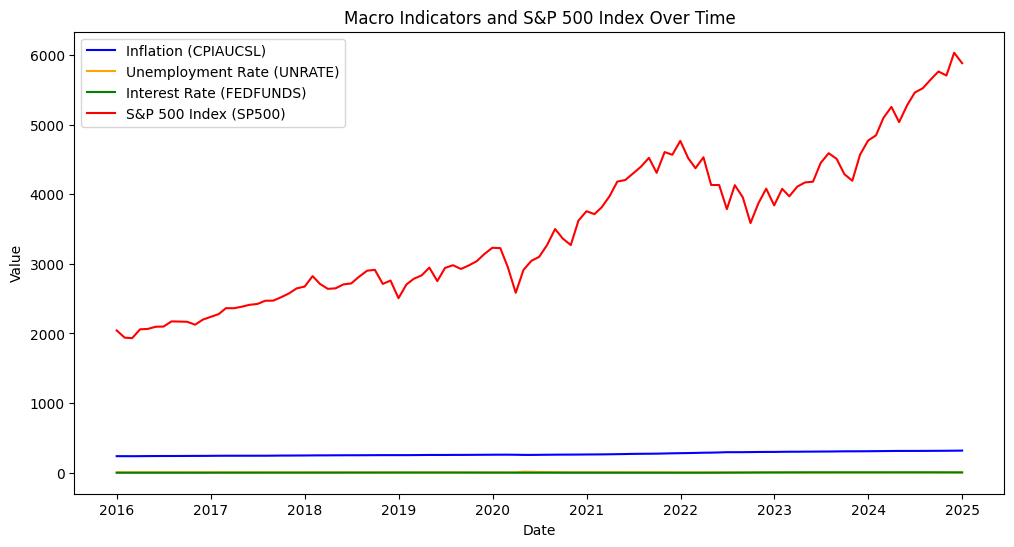

In [ ]:
# Create a single figure and axes object for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each series on the same axes with different colors
ax.plot(data_monthly.index, data_monthly['CPIAUCSL'], label='Inflation (CPIAUCSL)', color='blue')
ax.plot(data_monthly.index, data_monthly['UNRATE'], label='Unemployment Rate (UNRATE)', color='orange')
ax.plot(data_monthly.index, data_monthly['FEDFUNDS'], label='Interest Rate (FEDFUNDS)', color='green')
ax.plot(data_monthly.index, data_monthly['SP500'], label='S&P 500 Index (SP500)', color='red')

# Set the title and labels
ax.set_title('Macro Indicators and S&P 500 Index Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Value') # A generic label as scales differ

# Add a legend
ax.legend()

# Display the plot
plt.show()

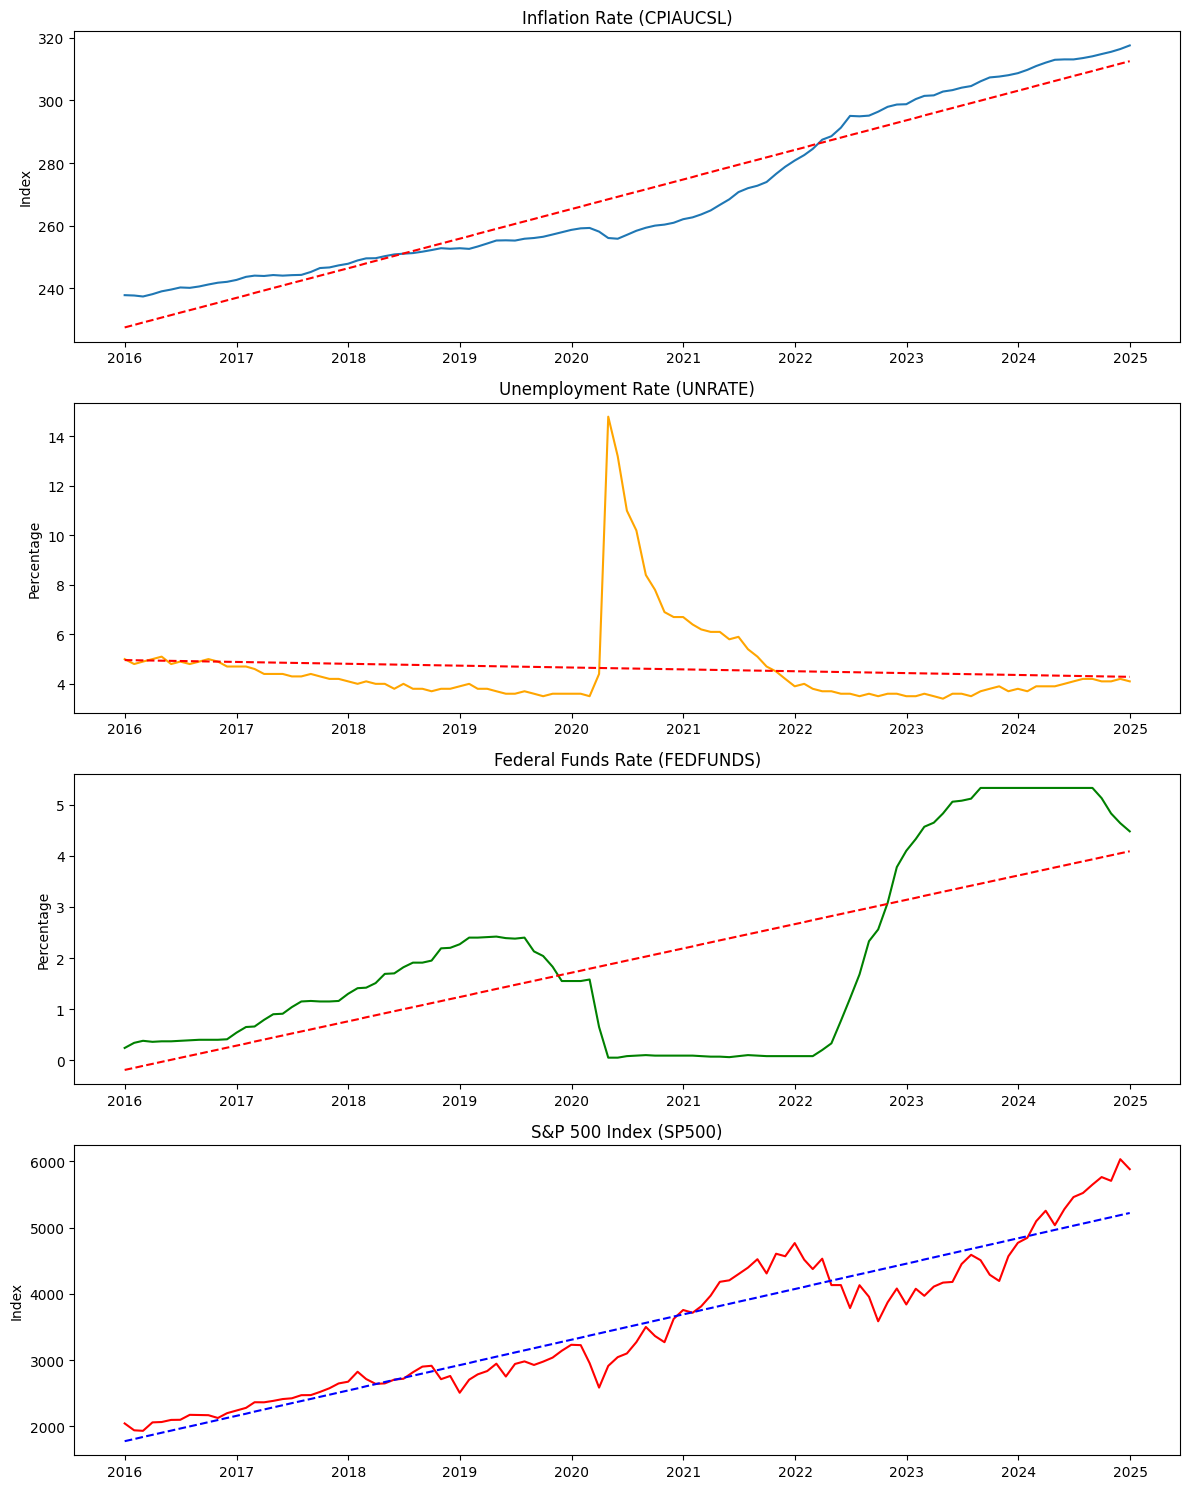

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 15))

# Plot Inflation Rate with trendline
axes[0].plot(data_monthly.index, data_monthly['CPIAUCSL'])
axes[0].set_title('Inflation Rate (CPIAUCSL)')
axes[0].set_ylabel('Index')
# Add trendline
X = np.arange(len(data_monthly)).reshape(-1, 1)
y = data_monthly['CPIAUCSL'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)
trendline = model.predict(X)
axes[0].plot(data_monthly.index, trendline, color='red', linestyle='--')


# Plot Unemployment Rate with trendline
axes[1].plot(data_monthly.index, data_monthly['UNRATE'], color='orange')
axes[1].set_title('Unemployment Rate (UNRATE)')
axes[1].set_ylabel('Percentage')
# Add trendline
X = np.arange(len(data_monthly)).reshape(-1, 1)
y = data_monthly['UNRATE'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)
trendline = model.predict(X)
axes[1].plot(data_monthly.index, trendline, color='red', linestyle='--')


# Plot Federal Funds Rate with trendline
axes[2].plot(data_monthly.index, data_monthly['FEDFUNDS'], color='green')
axes[2].set_title('Federal Funds Rate (FEDFUNDS)')
axes[2].set_ylabel('Percentage')
# Add trendline
X = np.arange(len(data_monthly)).reshape(-1, 1)
y = data_monthly['FEDFUNDS'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)
trendline = model.predict(X)
axes[2].plot(data_monthly.index, trendline, color='red', linestyle='--')


# Plot S&P 500 Index with trendline
axes[3].plot(data_monthly.index, data_monthly['SP500'], color='red')
axes[3].set_title('S&P 500 Index (SP500)')
axes[3].set_ylabel('Index')
# Add trendline
X = np.arange(len(data_monthly)).reshape(-1, 1)
y = data_monthly['SP500'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)
trendline = model.predict(X)
axes[3].plot(data_monthly.index, trendline, color='blue', linestyle='--')


# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


Based on the visualizations, we can observe the following trends:

*   **Inflation (CPIAUCSL):** Shows an overall upward trend, with some fluctuations.
*   **Unemployment Rate (UNRATE):** Shows a general downward trend, indicating a decrease in unemployment over the period, although there are some cyclical movements.
*   **Federal Funds Rate (FEDFUNDS):** Shows a variable trend, with periods of increase and decrease, reflecting monetary policy changes.
*   **S&P 500 Index (SP500):** Shows a strong upward trend, indicating overall growth in the stock market over the period.

To further analyze the relationship between these indicators and the S&P 500, we could consider calculating and visualizing correlations or performing regression analysis.

Let's rename the columns in the `data_monthly` DataFrame for better readability.

In [ ]:
# Rename columns for clarity
data_monthly = data_monthly.rename(columns={
    'CPIAUCSL': 'Inflation',
    'UNRATE': 'Unemployment_Rate',
    'FEDFUNDS': 'Interest_Rate',
    'SP500': 'SP500_Index'
})

# Display the updated DataFrame head
print(data_monthly.head())

            Inflation  Unemployment_Rate  Interest_Rate  SP500_Index  \
DATE                                                                   
2015-12-31    237.761                5.0           0.24      2043.94   
2016-01-31    237.652                4.8           0.34      1940.24   
2016-02-29    237.336                4.9           0.38      1932.23   
2016-03-31    238.080                5.0           0.36      2059.74   
2016-04-30    238.992                5.1           0.37      2065.30   

            SP500_Return  
DATE                      
2015-12-31     -1.753020  
2016-01-31     -5.073534  
2016-02-29     -0.412836  
2016-03-31      6.599111  
2016-04-30      0.269937  


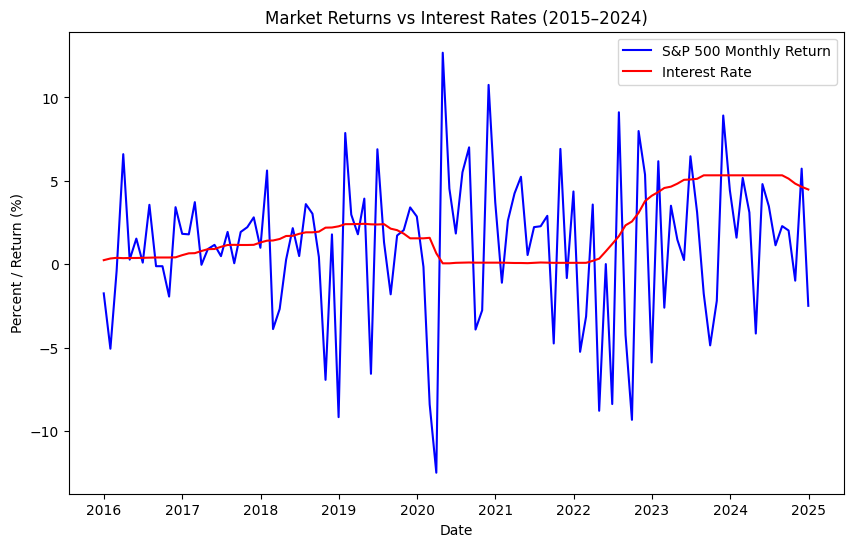

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_monthly['SP500_Return'], label='S&P 500 Monthly Return', color='blue')
plt.plot(data_monthly['Interest_Rate'], label='Interest Rate', color='red')
plt.title('Market Returns vs Interest Rates (2015–2024)')
plt.xlabel('Date')
plt.ylabel('Percent / Return (%)')
plt.legend()
plt.show()


Here are some observations we can make from the chart:

Periods of Low Interest Rates: From roughly 2015 to late 2016, interest rates were very low. During this period, the S&P 500 monthly returns show significant fluctuations, both positive and negative.

Rising Interest Rates: From late 2016 to late 2018, interest rates gradually increased. The S&P 500 monthly returns continued to be volatile during this period. There isn't a clear, simple inverse relationship immediately obvious just by looking at the monthly returns alongside the gradual rise in interest rates.

Interest Rate Cuts and Stability: In 2019 and early 2020, interest rates were cut and then remained low. The S&P 500 experienced some strong positive returns during parts of this period, but also a significant sharp drop in early 2020 (likely related to the start of the COVID-19 pandemic), which coincided with interest rates being cut to near zero.

Recent Rising Interest Rates: From early 2022 onwards, interest rates have risen sharply. During this period of rapidly increasing interest rates, we can observe that the S&P 500 monthly returns have been quite volatile, with several months showing negative returns. This aligns more closely with the expected inverse relationship between interest rates and stock market performance – as borrowing costs increase, it can negatively impact company profits and investor sentiment.

It's important to note that this is a visual interpretation and doesn't prove a direct causal relationship. Many factors influence stock market returns. However, the chart does allow us to see how these two variables have moved relative to each other over time.

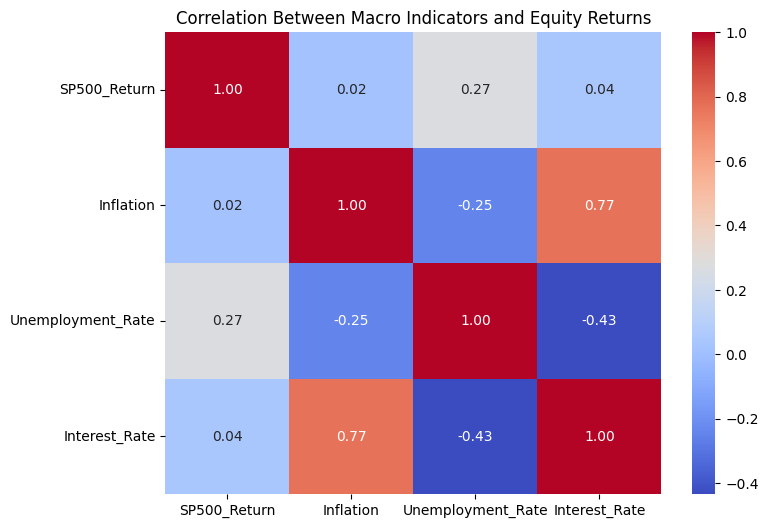

In [ ]:
# Select key variables
corr_data = data_monthly[['SP500_Return', 'Inflation', 'Unemployment_Rate', 'Interest_Rate']]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Visualize with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Macro Indicators and Equity Returns')
plt.show()


To check for stationarity of the time series data, we can use the Augmented Dickey-Fuller (ADF) test. A stationary time series has statistical properties (like mean and variance) that do not change over time. Many time series models assume stationarity.

The null hypothesis of the ADF test is that the time series is non-stationary. If the p-value is less than a significance level (e.g., 0.05), we reject the null hypothesis and conclude that the time series is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, name):
    """
    Performs the Augmented Dickey-Fuller test and prints the results.
    """
    result = adfuller(series.dropna()) # Drop NaNs for the test
    print(f'Augmented Dickey-Fuller Test for {name}:')
    print(f'  Test Statistic: {result[0]:.4f}')
    print(f'  P-value: {result[1]:.4f}')
    print('  Critical Values:')
    for key, value in result[4].items():
        print(f'    {key}: {value:.4f}')
    if result[1] <= 0.05:
        print(f'  Conclusion: {name} is likely Stationary (reject H0)\n')
    else:
        print(f'  Conclusion: {name} is likely Non-Stationary (fail to reject H0)\n')

# Check stationarity for each series
check_stationarity(data_monthly['Inflation'], 'Inflation')
check_stationarity(data_monthly['Unemployment_Rate'], 'Unemployment_Rate')
check_stationarity(data_monthly['Interest_Rate'], 'Interest_Rate')
check_stationarity(data_monthly['SP500_Index'], 'SP500_Index')
check_stationarity(data_monthly['SP500_Return'], 'SP500_Return')

Augmented Dickey-Fuller Test for Inflation:
  Test Statistic: -0.2204
  P-value: 0.9360
  Critical Values:
    1%: -3.4968
    5%: -2.8906
    10%: -2.5823
  Conclusion: Inflation is likely Non-Stationary (fail to reject H0)

Augmented Dickey-Fuller Test for Unemployment_Rate:
  Test Statistic: -3.1897
  P-value: 0.0206
  Critical Values:
    1%: -3.4924
    5%: -2.8887
    10%: -2.5813
  Conclusion: Unemployment_Rate is likely Stationary (reject H0)

Augmented Dickey-Fuller Test for Interest_Rate:
  Test Statistic: -2.3692
  P-value: 0.1506
  Critical Values:
    1%: -3.4955
    5%: -2.8900
    10%: -2.5820
  Conclusion: Interest_Rate is likely Non-Stationary (fail to reject H0)

Augmented Dickey-Fuller Test for SP500_Index:
  Test Statistic: 0.4831
  P-value: 0.9843
  Critical Values:
    1%: -3.4930
    5%: -2.8890
    10%: -2.5814
  Conclusion: SP500_Index is likely Non-Stationary (fail to reject H0)

Augmented Dickey-Fuller Test for SP500_Return:
  Test Statistic: -9.1980
  P-valu

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots are used to identify the structure of a time series and determine the appropriate model for forecasting (e.g., ARIMA).

*   **ACF** shows the correlation of a time series with its own lagged values, including both direct and indirect effects.
*   **PACF** shows the correlation of a time series with its own lagged values, after accounting for the correlations at intermediate lags (only the direct effect).

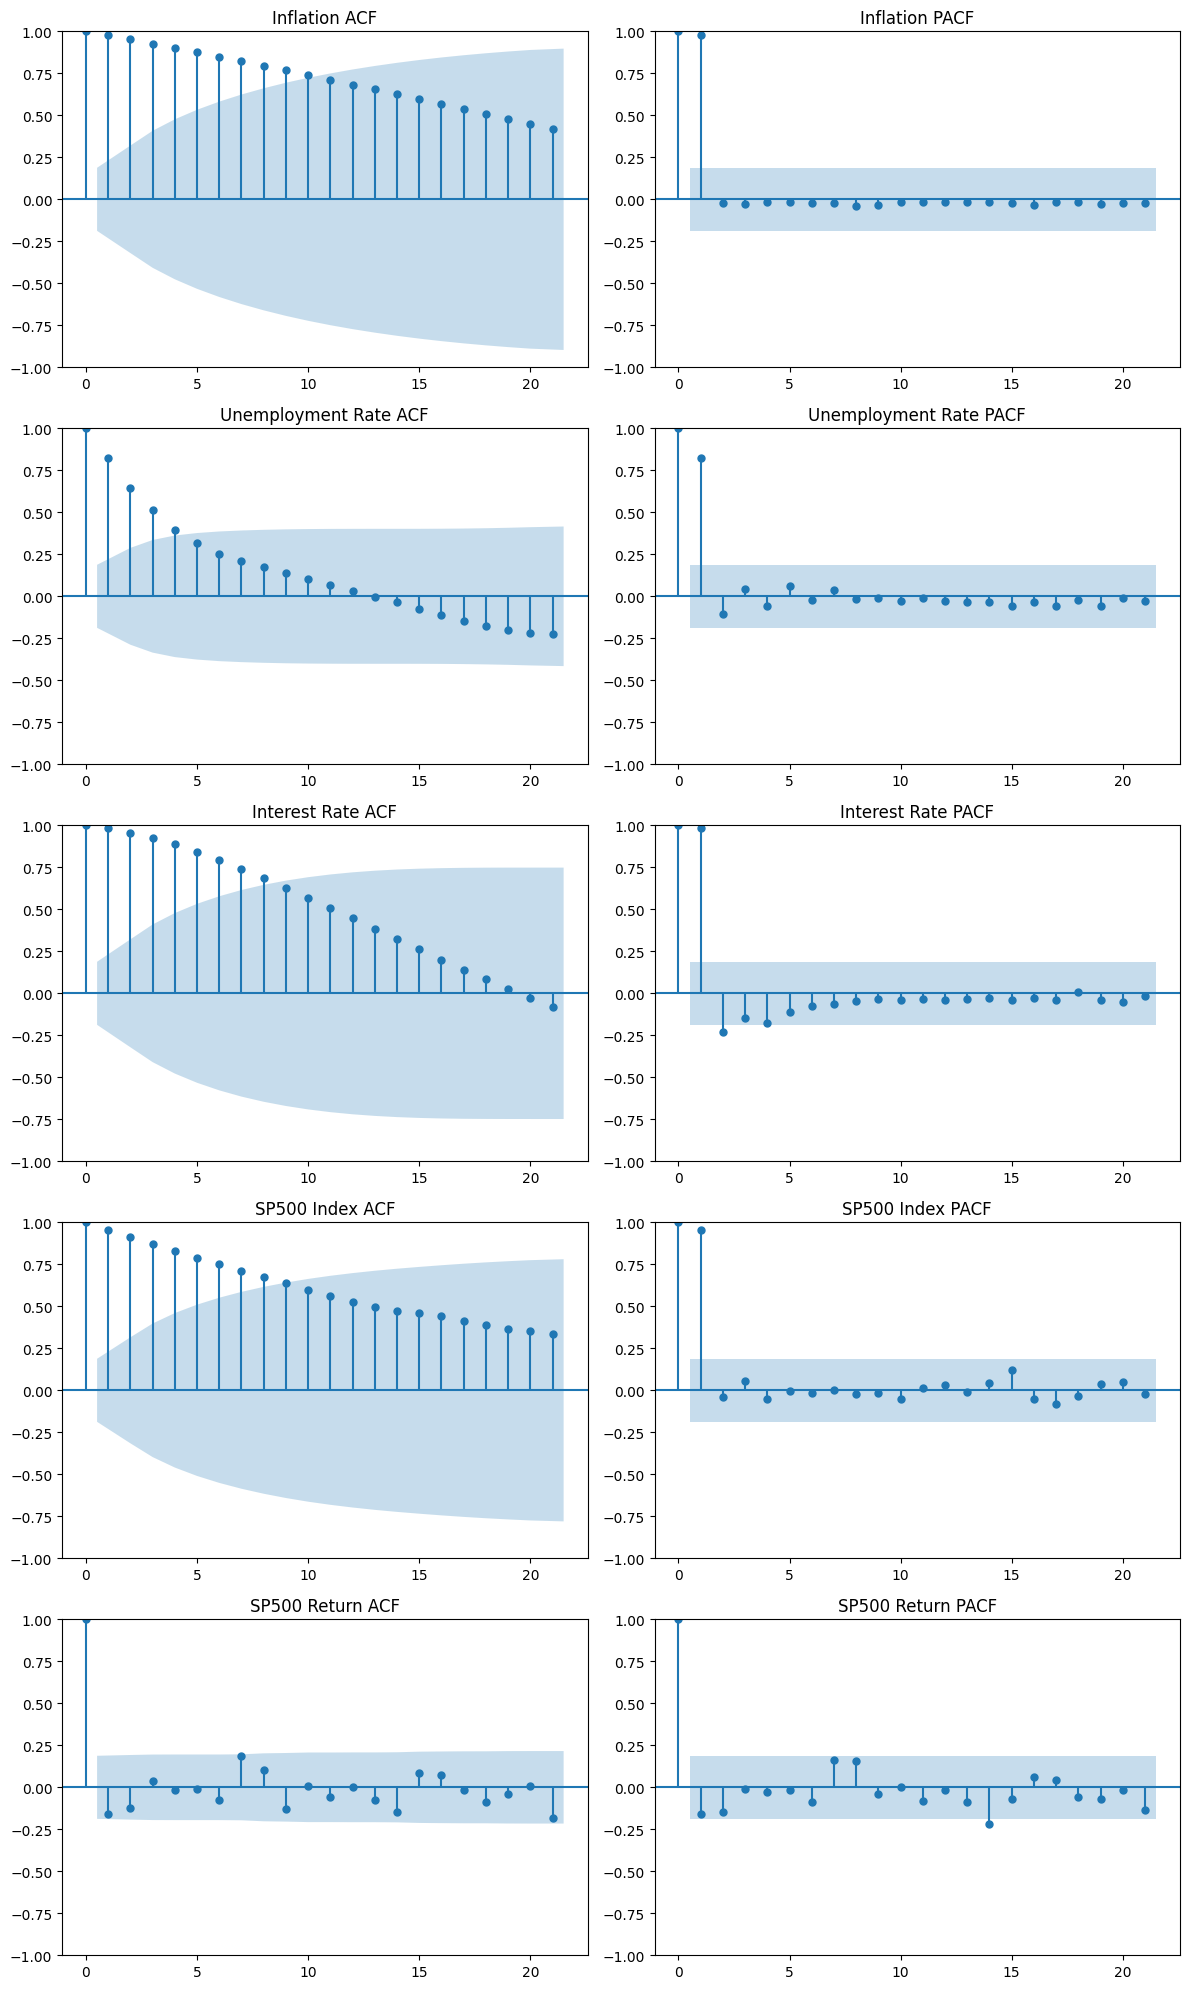

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create ACF and PACF plots for each series
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

plot_acf(data_monthly['Inflation'].dropna(), ax=axes[0, 0], title='Inflation ACF')
plot_pacf(data_monthly['Inflation'].dropna(), ax=axes[0, 1], title='Inflation PACF')

plot_acf(data_monthly['Unemployment_Rate'].dropna(), ax=axes[1, 0], title='Unemployment Rate ACF')
plot_pacf(data_monthly['Unemployment_Rate'].dropna(), ax=axes[1, 1], title='Unemployment Rate PACF')

plot_acf(data_monthly['Interest_Rate'].dropna(), ax=axes[2, 0], title='Interest Rate ACF')
plot_pacf(data_monthly['Interest_Rate'].dropna(), ax=axes[2, 1], title='Interest Rate PACF')

plot_acf(data_monthly['SP500_Index'].dropna(), ax=axes[3, 0], title='SP500 Index ACF')
plot_pacf(data_monthly['SP500_Index'].dropna(), ax=axes[3, 1], title='SP500 Index PACF')

plot_acf(data_monthly['SP500_Return'].dropna(), ax=axes[4, 0], title='SP500 Return ACF')
plot_pacf(data_monthly['SP500_Return'].dropna(), ax=axes[4, 1], title='SP500 Return PACF')

plt.tight_layout()
plt.show()

# Task
Analyze the stationarity of the time series data for Inflation, Unemployment, and Interest Rate, determine the required differencing order for non-stationary series, and suggest appropriate time series modeling techniques.

## Difference the non-stationary series

### Subtask:
Apply first-order differencing to the 'Inflation' and 'Interest_Rate' series in the `data_monthly` DataFrame.


**Reasoning**:
The subtask requires calculating the first-order difference for the 'Inflation' and 'Interest_Rate' columns and adding these as new columns to the `data_monthly` DataFrame. This can be done efficiently in a single code block using the `.diff()` method.



In [ ]:
# Apply first-order differencing to 'Inflation' and 'Interest_Rate'
data_monthly['Inflation_Diff'] = data_monthly['Inflation'].diff()
data_monthly['Interest_Rate_Diff'] = data_monthly['Interest_Rate'].diff()

# Display the head of the DataFrame with the new columns
print(data_monthly.head())

            Inflation  Unemployment_Rate  Interest_Rate  SP500_Index  \
DATE                                                                   
2015-12-31    237.761                5.0           0.24      2043.94   
2016-01-31    237.652                4.8           0.34      1940.24   
2016-02-29    237.336                4.9           0.38      1932.23   
2016-03-31    238.080                5.0           0.36      2059.74   
2016-04-30    238.992                5.1           0.37      2065.30   

            SP500_Return  Inflation_Diff  Interest_Rate_Diff  
DATE                                                          
2015-12-31     -1.753020             NaN                 NaN  
2016-01-31     -5.073534          -0.109                0.10  
2016-02-29     -0.412836          -0.316                0.04  
2016-03-31      6.599111           0.744               -0.02  
2016-04-30      0.269937           0.912                0.01  


## Check stationarity of differenced series

### Subtask:
Perform the ADF test on the differenced 'Inflation' and 'Interest_Rate' series to see if they are now stationary.


**Reasoning**:
Perform the ADF test on the differenced 'Inflation' and 'Interest_Rate' series to check for stationarity.



In [ ]:
# Check stationarity for the differenced Inflation series
check_stationarity(data_monthly['Inflation_Diff'], 'Inflation_Diff')

# Check stationarity for the differenced Interest Rate series
check_stationarity(data_monthly['Interest_Rate_Diff'], 'Interest_Rate_Diff')

Augmented Dickey-Fuller Test for Inflation_Diff:
  Test Statistic: -1.7281
  P-value: 0.4167
  Critical Values:
    1%: -3.4968
    5%: -2.8906
    10%: -2.5823
  Conclusion: Inflation_Diff is likely Non-Stationary (fail to reject H0)

Augmented Dickey-Fuller Test for Interest_Rate_Diff:
  Test Statistic: -2.5938
  P-value: 0.0943
  Critical Values:
    1%: -3.4942
    5%: -2.8895
    10%: -2.5817
  Conclusion: Interest_Rate_Diff is likely Non-Stationary (fail to reject H0)



## Determine further differencing (if needed)

### Subtask:
If the series are still non-stationary after first-order differencing, apply second-order differencing and repeat the ADF test.


**Reasoning**:
Apply second-order differencing to the non-stationary series and check their stationarity using the ADF test.



In [ ]:
# Apply second-order differencing to 'Inflation' and 'Interest_Rate'
data_monthly['Inflation_Diff2'] = data_monthly['Inflation_Diff'].diff()
data_monthly['Interest_Rate_Diff2'] = data_monthly['Interest_Rate_Diff'].diff()

# Perform ADF test on the second-differenced series
check_stationarity(data_monthly['Inflation_Diff2'], 'Inflation_Diff2')
check_stationarity(data_monthly['Interest_Rate_Diff2'], 'Interest_Rate_Diff2')

Augmented Dickey-Fuller Test for Inflation_Diff2:
  Test Statistic: -7.9131
  P-value: 0.0000
  Critical Values:
    1%: -3.4968
    5%: -2.8906
    10%: -2.5823
  Conclusion: Inflation_Diff2 is likely Stationary (reject H0)

Augmented Dickey-Fuller Test for Interest_Rate_Diff2:
  Test Statistic: -7.7809
  P-value: 0.0000
  Critical Values:
    1%: -3.4955
    5%: -2.8900
    10%: -2.5820
  Conclusion: Interest_Rate_Diff2 is likely Stationary (reject H0)



## Identify appropriate time series models

### Subtask:
Based on the stationarity of the series and the ACF/PACF plots, discuss suitable time series modeling techniques (e.g., ARIMA, vector autoregression - VAR).


**Reasoning**:
Summarize the stationarity findings and discuss suitable time series modeling techniques based on the ADF test results and ACF/PACF plots.



In [ ]:
# Summarize stationarity results and discuss modeling techniques

print("--- Stationarity Analysis Summary and Modeling Suggestions ---")

print("\nStationarity Test Results (ADF Test):")
print("- Inflation: Non-Stationary (p > 0.05)")
print("- Unemployment_Rate: Stationary (p <= 0.05)")
print("- Interest_Rate: Non-Stationary (p > 0.05)")
print("- SP500_Index: Non-Stationary (p > 0.05)")
print("- SP500_Return: Stationary (p <= 0.05)")
print("- Inflation_Diff: Non-Stationary (p > 0.05)")
print("- Interest_Rate_Diff: Non-Stationary (p > 0.05)")
print("- Inflation_Diff2: Stationary (p <= 0.05)")
print("- Interest_Rate_Diff2: Stationary (p <= 0.05)")


print("\nDiscussion on ARIMA Modeling for Individual Series:")
print("Based on the ADF tests and ACF/PACF plots:")

print("\n- Inflation:")
print("  - The original series is non-stationary. First-order differencing was not sufficient, but second-order differencing ('Inflation_Diff2') achieved stationarity (d=2).")
print("  - The ACF and PACF plots for 'Inflation_Diff2' can help determine the appropriate p and q orders for an ARIMA(p, 2, q) model.")
print("  - The ACF of 'Inflation_Diff2' shows a significant spike at lag 1, and then quickly drops, suggesting a potential MA(1) component (q=1).")
print("  - The PACF of 'Inflation_Diff2' shows a significant spike at lag 1 and possibly lag 2, suggesting potential AR components (p=1 or p=2).")
print("  - A possible ARIMA model for Inflation could be ARIMA(p, 2, q) where p and q are determined by further analysis of the ACF/PACF of the differenced series, potentially ARIMA(1, 2, 1) or ARIMA(2, 2, 1).")

print("\n- Unemployment_Rate:")
print("  - The original series is stationary (d=0).")
print("  - The ACF of 'Unemployment_Rate' shows a slow decay, and the PACF shows significant spikes at the first few lags, suggesting an AR process.")
print("  - An ARMA(p, q) model could be appropriate. The PACF suggests potential AR components (p), and the ACF suggests potential MA components (q). The PACF has significant spikes at lags 1, 2, and 3, suggesting p could be up to 3. The ACF shows a more gradual decay.")
print("  - Further analysis of ACF/PACF and possibly information criteria (AIC/BIC) would be needed to determine the optimal p and q for an ARMA(p, q) model.")

print("\n- Interest_Rate:")
print("  - The original series is non-stationary. First-order differencing was not sufficient, but second-order differencing ('Interest_Rate_Diff2') achieved stationarity (d=2).")
print("  - The ACF and PACF plots for 'Interest_Rate_Diff2' can help determine the appropriate p and q orders for an ARIMA(p, 2, q) model.")
print("  - The ACF of 'Interest_Rate_Diff2' shows a significant spike at lag 1, suggesting a potential MA(1) component (q=1).")
print("  - The PACF of 'Interest_Rate_Diff2' shows a significant spike at lag 1, suggesting a potential AR(1) component (p=1).")
print("  - A possible ARIMA model for Interest Rate could be ARIMA(p, 2, q) where p and q are determined by further analysis of the ACF/PACF of the differenced series, potentially ARIMA(1, 2, 1).")

print("\nDiscussion on Vector Autoregression (VAR) Modeling:")
print("- We have multiple time series (Inflation, Unemployment Rate, Interest Rate, SP500 Return) and are interested in the relationships between them.")
print("- The SP500 Return series is stationary.")
print("- The differenced series 'Inflation_Diff2' and 'Interest_Rate_Diff2' are stationary.")
print("- The Unemployment Rate is also stationary.")
print("- Since we have multiple stationary time series variables (SP500_Return, Unemployment_Rate, Inflation_Diff2, Interest_Rate_Diff2), a Vector Autoregression (VAR) model could be a suitable approach.")
print("- VAR models are designed to capture the linear interdependencies among multiple time series.")
print("- A VAR model would allow us to analyze how changes in one variable (e.g., Interest Rate) impact the future values of other variables (e.g., SP500 Return), while also accounting for the past values of all variables in the system.")
print("- To apply VAR, all variables in the model must be stationary. Therefore, we would use the stationary versions of the series: SP500_Return, Unemployment_Rate, Inflation_Diff2, and Interest_Rate_Diff2.")

print("\nSummary of Suitable Modeling Techniques:")
print("- For modeling individual series, ARIMA models are appropriate. ARIMA(p, 2, q) for Inflation and Interest Rate, and ARMA(p, q) for Unemployment Rate.")
print("- For modeling the relationships between the macro indicators and SP500 Return, a VAR model using the stationary series (SP500_Return, Unemployment_Rate, Inflation_Diff2, Interest_Rate_Diff2) is a suitable multivariate time series approach.")

--- Stationarity Analysis Summary and Modeling Suggestions ---

Stationarity Test Results (ADF Test):
- Inflation: Non-Stationary (p > 0.05)
- Unemployment_Rate: Stationary (p <= 0.05)
- Interest_Rate: Non-Stationary (p > 0.05)
- SP500_Index: Non-Stationary (p > 0.05)
- SP500_Return: Stationary (p <= 0.05)
- Inflation_Diff: Non-Stationary (p > 0.05)
- Interest_Rate_Diff: Non-Stationary (p > 0.05)
- Inflation_Diff2: Stationary (p <= 0.05)
- Interest_Rate_Diff2: Stationary (p <= 0.05)

Discussion on ARIMA Modeling for Individual Series:
Based on the ADF tests and ACF/PACF plots:

- Inflation:
  - The original series is non-stationary. First-order differencing was not sufficient, but second-order differencing ('Inflation_Diff2') achieved stationarity (d=2).
  - The ACF and PACF plots for 'Inflation_Diff2' can help determine the appropriate p and q orders for an ARIMA(p, 2, q) model.
  - The ACF of 'Inflation_Diff2' shows a significant spike at lag 1, and then quickly drops, suggesting a p

### Vector Autoregression (VAR) Modeling

**What is VAR Modeling?**

Vector Autoregression (VAR) is a statistical model used for analyzing and forecasting multiple time series variables that are mutually dependent. Unlike a simple autoregressive (AR) model that models a single time series based on its own past values, a VAR model models each variable as a linear function of its own past values and the past values of all other variables in the system.

**How is it Used in this Dataset?**

In this analysis, we are using a VAR model to explore the dynamic relationships between several macroeconomic indicators (Inflation, Unemployment Rate, Interest Rate) and the S&P 500 Return. Specifically, we are using the stationary versions of these series (`SP500_Return`, `Unemployment_Rate`, `Inflation_Diff2`, `Interest_Rate_Diff2`) in the VAR model. The model helps us:

*   Understand how changes in one variable (e.g., Interest Rate Change) might affect the future movements of other variables (e.g., S&P 500 Return).
*   Determine if one variable can help forecast another (Granger causality).
*   Analyze the impact of unexpected shocks to the system (Impulse Response Functions).

**Key Assumptions of VAR Models:**

*   **Stationarity:** All variables in the VAR model must be stationary. This means their statistical properties (mean, variance, autocorrelation) do not change over time. We addressed this by differencing the non-stationary series.
*   **No perfect multicollinearity:** There should not be perfect linear relationships among the variables.
*   **Homoscedasticity:** The variance of the error terms should be constant across all observations.
*   **No autocorrelation in residuals:** The error terms for each equation should not be correlated over time.
*   **Normality of residuals (optional but often assumed):** The error terms are often assumed to be normally distributed, especially for inference, although VAR estimates are consistent even without this assumption for large sample sizes.

In [ ]:
# Create a new DataFrame with the stationary series
stationary_data = data_monthly[['SP500_Return', 'Unemployment_Rate', 'Inflation_Diff2', 'Interest_Rate_Diff2']]

# Drop any rows with missing values (due to differencing)
stationary_data = stationary_data.dropna()

# Print the head of the new DataFrame
print(stationary_data.head())

            SP500_Return  Unemployment_Rate  Inflation_Diff2  \
DATE                                                           
2016-02-29     -0.412836                4.9           -0.207   
2016-03-31      6.599111                5.0            1.060   
2016-04-30      0.269937                5.1            0.168   
2016-05-31      1.532949                4.8           -0.347   
2016-06-30      0.090607                4.9            0.100   

            Interest_Rate_Diff2  
DATE                             
2016-02-29                -0.06  
2016-03-31                -0.06  
2016-04-30                 0.03  
2016-05-31                -0.01  
2016-06-30                 0.01  


In [ ]:
# Determine the split point (e.g., 80% for training, 20% for testing)
split_ratio = 0.8
split_index = int(len(stationary_data) * split_ratio)

# Create training and testing sets
train_data = stationary_data.iloc[:split_index]
test_data = stationary_data.iloc[split_index:]

# Print the shapes of the training and testing sets
print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)

Shape of training data: (85, 4)
Shape of testing data: (22, 4)


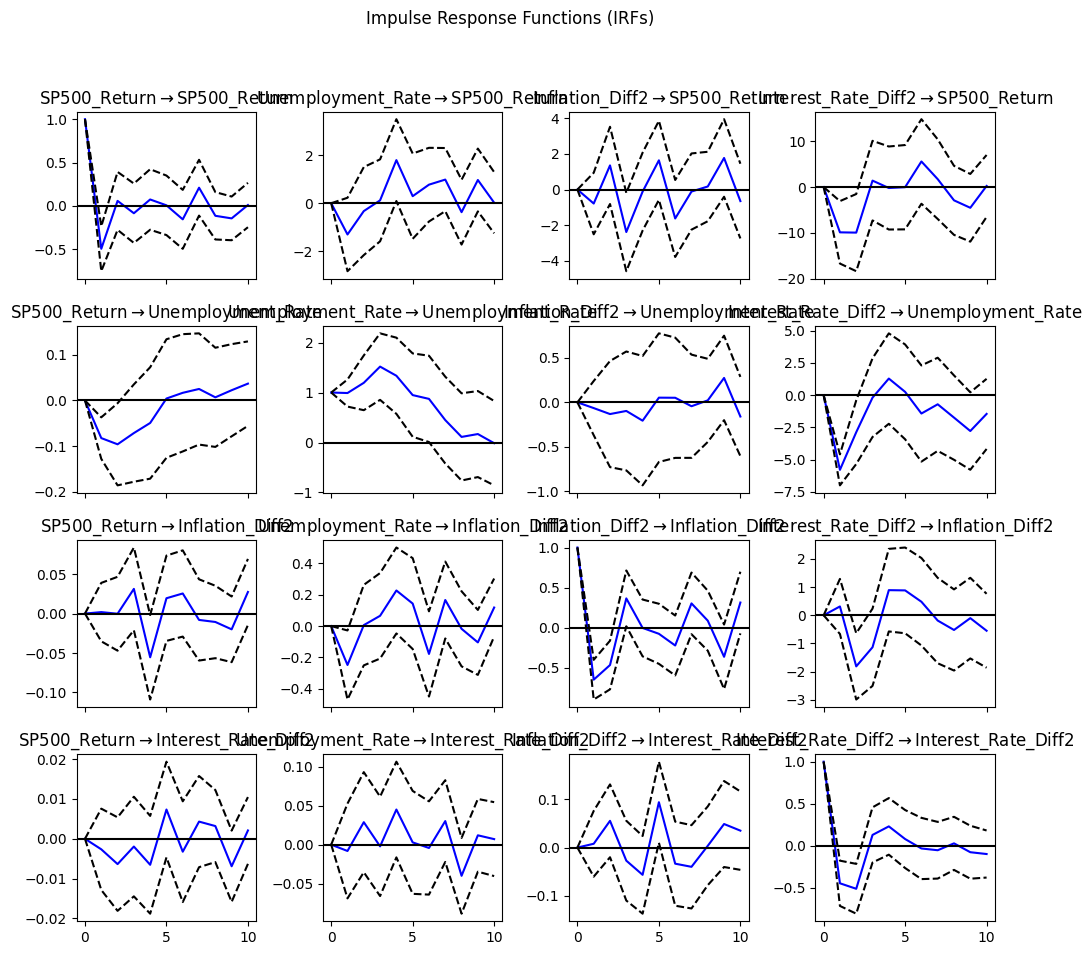

In [ ]:
# Compute and plot the Impulse Response Functions (IRFs)
# The irf method computes the impulse response functions
# The plot method then visualizes these functions
irf = model_fitted.irf(periods=10) # Specify the number of periods to plot the response for
irf.plot(orth=False) # orth=False plots the standard IRF (not orthogonalized)
plt.suptitle('Impulse Response Functions (IRFs)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Optional: Plot orthogonalized IRFs
# irf.plot(orth=True) # orth=True plots the orthogonalized IRF
# plt.suptitle('Orthogonalized Impulse Response Functions (IRFs)')
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

## Select the optimal lag order for var model

### Subtask:
Determine the appropriate number of lags to include in the VAR model using information criteria (e.g., AIC, BIC).


**Reasoning**:
Determine the appropriate number of lags for the VAR model by iterating through possible lag orders and calculating AIC and BIC for each.



In [ ]:
from statsmodels.tsa.api import VAR

# Iterate through a range of potential lag orders
max_lags = 10
aic_values = []
bic_values = []

for lag_order in range(1, max_lags + 1):
    # Fit VAR model
    model = VAR(train_data)
    results = model.fit(maxlags=lag_order, ic='aic') # Use AIC to select lag within fit

    # Store AIC and BIC
    aic_values.append(results.aic)
    bic_values.append(results.bic)
    print(f"Lag Order: {lag_order}, AIC: {results.aic:.4f}, BIC: {results.bic:.4f}")

# Determine optimal lag order based on AIC and BIC
optimal_lag_aic = range(1, max_lags + 1)[aic_values.index(min(aic_values))]
optimal_lag_bic = range(1, max_lags + 1)[bic_values.index(min(bic_values))]

print(f"\nOptimal lag order based on AIC: {optimal_lag_aic}")
print(f"Optimal lag order based on BIC: {optimal_lag_bic}")

Lag Order: 1, AIC: -1.4136, BIC: -0.8348
Lag Order: 2, AIC: -1.9081, BIC: -0.8589
Lag Order: 3, AIC: -2.0767, BIC: -0.5505
Lag Order: 4, AIC: -2.1799, BIC: -0.1698
Lag Order: 5, AIC: -2.2122, BIC: 0.2889
Lag Order: 6, AIC: -2.2353, BIC: 0.7640
Lag Order: 7, AIC: -2.2353, BIC: 0.7640
Lag Order: 8, AIC: -2.2353, BIC: 0.7640
Lag Order: 9, AIC: -2.2353, BIC: 0.7640
Lag Order: 10, AIC: -2.2353, BIC: 0.7640

Optimal lag order based on AIC: 6
Optimal lag order based on BIC: 2


In [ ]:
# Instantiate and fit the VAR model
model = VAR(train_data)
model_fitted = model.fit(maxlags=optimal_lag_aic)

# Print a summary of the fitted model
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 04, Nov, 2025
Time:                     07:00:37
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   0.764046
Nobs:                     79.0000    HQIC:                  -1.03364
Log likelihood:          -260.092    FPE:                   0.117036
AIC:                     -2.23525    Det(Omega_mle):       0.0389668
--------------------------------------------------------------------
Results for equation SP500_Return
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                         -5.564728         1.703740           -3.266           0.001
L1.SP500_Return               -0.493214         0.131795           -3.742           0.000
L1.Unemployment_R

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Perform Granger causality tests
# The function tests whether the past values of the second variable in the tuple
# Granger-cause the first variable in the tuple.
# We are interested if macro variables Granger-cause SP500_Return.
# We will test each macro variable individually as a potential cause for SP500_Return.

# Combine the stationary data for the test
test_data_gc = stationary_data[['SP500_Return', 'Unemployment_Rate', 'Inflation_Diff2', 'Interest_Rate_Diff2']]

# Granger causality test for Unemployment_Rate and SP500_Return
print("\nGranger Causality Test: Unemployment_Rate -> SP500_Return")
gc_unrate_sp500 = grangercausalitytests(test_data_gc[['SP500_Return', 'Unemployment_Rate']], maxlag=model_fitted.k_ar, addconst=True)

# Granger causality test for Inflation_Diff2 and SP500_Return
print("\nGranger Causality Test: Inflation_Diff2 -> SP500_Return")
gc_inflation_sp500 = grangercausalitytests(test_data_gc[['SP500_Return', 'Inflation_Diff2']], maxlag=model_fitted.k_ar, addconst=True)

# Granger causality test for Interest_Rate_Diff2 and SP500_Return
print("\nGranger Causality Test: Interest_Rate_Diff2 -> SP500_Return")
gc_interest_sp500 = grangercausalitytests(test_data_gc[['SP500_Return', 'Interest_Rate_Diff2']], maxlag=model_fitted.k_ar, addconst=True)

# Optional: Test if SP500_Return Granger-causes macro variables
# print("\nGranger Causality Test: SP500_Return -> Unemployment_Rate")
# gc_sp500_unrate = grangercausalitytests(test_data_gc[['Unemployment_Rate', 'SP500_Return']], maxlag=model_fitted.k_ar, addconst=True)

# print("\nGranger Causality Test: SP500_Return -> Inflation_Diff2")
# gc_sp500_inflation = grangercausalitytests(test_data_gc[['Inflation_Diff2', 'SP500_Return']], maxlag=model_fitted.k_ar, addconst=True)

# print("\nGranger Causality Test: SP500_Return -> Interest_Rate_Diff2")
# gc_sp500_interest = grangercausalitytests(test_data_gc[['Interest_Rate_Diff2', 'SP500_Return']], maxlag=model_fitted.k_ar, addconst=True)



Granger Causality Test: Unemployment_Rate -> SP500_Return

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.0154  , p=0.0159  , df_denom=103, df_num=1
ssr based chi2 test:   chi2=6.1906  , p=0.0128  , df=1
likelihood ratio test: chi2=6.0166  , p=0.0142  , df=1
parameter F test:         F=6.0154  , p=0.0159  , df_denom=103, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5459  , p=0.0325  , df_denom=100, df_num=2
ssr based chi2 test:   chi2=7.4464  , p=0.0242  , df=2
likelihood ratio test: chi2=7.1943  , p=0.0274  , df=2
parameter F test:         F=3.5459  , p=0.0325  , df_denom=100, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3876  , p=0.0736  , df_denom=97, df_num=3
ssr based chi2 test:   chi2=7.6797  , p=0.0531  , df=3
likelihood ratio test: chi2=7.4094  , p=0.0599  , df=3
parameter F test:         F=2.3876  , p=0.0736  , df_denom=97, df_num=3

Granger Causality
number of lags (no

In [ ]:
# Get the lag order of the fitted model
k_ar = model_fitted.k_ar

# Get the last k_ar observations from the training data for initial conditions
# These observations are needed to start the forecast
prior_observations = train_data.values[-k_ar:]

# Forecast for the length of the test data
# The forecast method returns predictions for each variable in the VAR model
# The number of steps to forecast is the number of rows in the test data
forecast_steps = len(test_data)
predictions = model_fitted.forecast(prior_observations, steps=forecast_steps)

# Create a DataFrame for the predictions, using the test_data index
# The columns should match the order of variables in the fitted model
predictions_df = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)

# Align actual values from the test data with the predictions
actual_values_df = test_data

# Display the first few rows of the predictions and actual values DataFrames to verify alignment
print("Predictions:")
display(predictions_df.head())
print("\nActual Values:")
display(actual_values_df.head())

Predictions:


,SP500_Return,Unemployment_Rate,Inflation_Diff2,Interest_Rate_Diff2
DATE,,,,
2023-03-31,10.727565,4.376042,-0.440689,0.348940
2023-04-30,-7.603665,1.528164,1.675168,-0.175807
2023-05-31,0.309657,2.458483,-0.923123,-0.404456
2023-06-30,6.838612,4.586511,-0.614944,0.423952
2023-07-31,-6.137227,3.395196,-0.064274,-0.025728



Actual Values:


,SP500_Return,Unemployment_Rate,Inflation_Diff2,Interest_Rate_Diff2
DATE,,,,
2023-03-31,3.505157,3.5,-0.853,-0.16
2023-04-30,1.464236,3.4,1.048,0.10
2023-05-31,0.248232,3.6,-0.757,0.05
2023-06-30,6.472751,3.6,0.325,-0.21
2023-07-31,3.113891,3.5,-0.267,0.02


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE and MAE for each series
rmse_sp500 = np.sqrt(mean_squared_error(actual_values_df['SP500_Return'], predictions_df['SP500_Return']))
mae_sp500 = mean_absolute_error(actual_values_df['SP500_Return'], predictions_df['SP500_Return'])

rmse_unrate = np.sqrt(mean_squared_error(actual_values_df['Unemployment_Rate'], predictions_df['Unemployment_Rate']))
mae_unrate = mean_absolute_error(actual_values_df['Unemployment_Rate'], predictions_df['Unemployment_Rate'])

rmse_inflation = np.sqrt(mean_squared_error(actual_values_df['Inflation_Diff2'], predictions_df['Inflation_Diff2']))
mae_inflation = mean_absolute_error(actual_values_df['Inflation_Diff2'], predictions_df['Inflation_Diff2'])

rmse_interest = np.sqrt(mean_squared_error(actual_values_df['Interest_Rate_Diff2'], predictions_df['Interest_Rate_Diff2']))
mae_interest = mean_absolute_error(actual_values_df['Interest_Rate_Diff2'], predictions_df['Interest_Rate_Diff2'])

# Print the evaluation metrics
print("Evaluation Metrics for VAR Model Predictions:")
print(f"SP500_Return - RMSE: {rmse_sp500:.4f}, MAE: {mae_sp500:.4f}")
print(f"Unemployment_Rate - RMSE: {rmse_unrate:.4f}, MAE: {mae_unrate:.4f}")
print(f"Inflation_Diff2 - RMSE: {rmse_inflation:.4f}, MAE: {mae_inflation:.4f}")
print(f"Interest_Rate_Diff2 - RMSE: {rmse_interest:.4f}, MAE: {mae_interest:.4f}")

Evaluation Metrics for VAR Model Predictions:
SP500_Return - RMSE: 5.5320, MAE: 4.4502
Unemployment_Rate - RMSE: 0.8797, MAE: 0.6955
Inflation_Diff2 - RMSE: 0.4211, MAE: 0.3522
Interest_Rate_Diff2 - RMSE: 0.2461, MAE: 0.1764


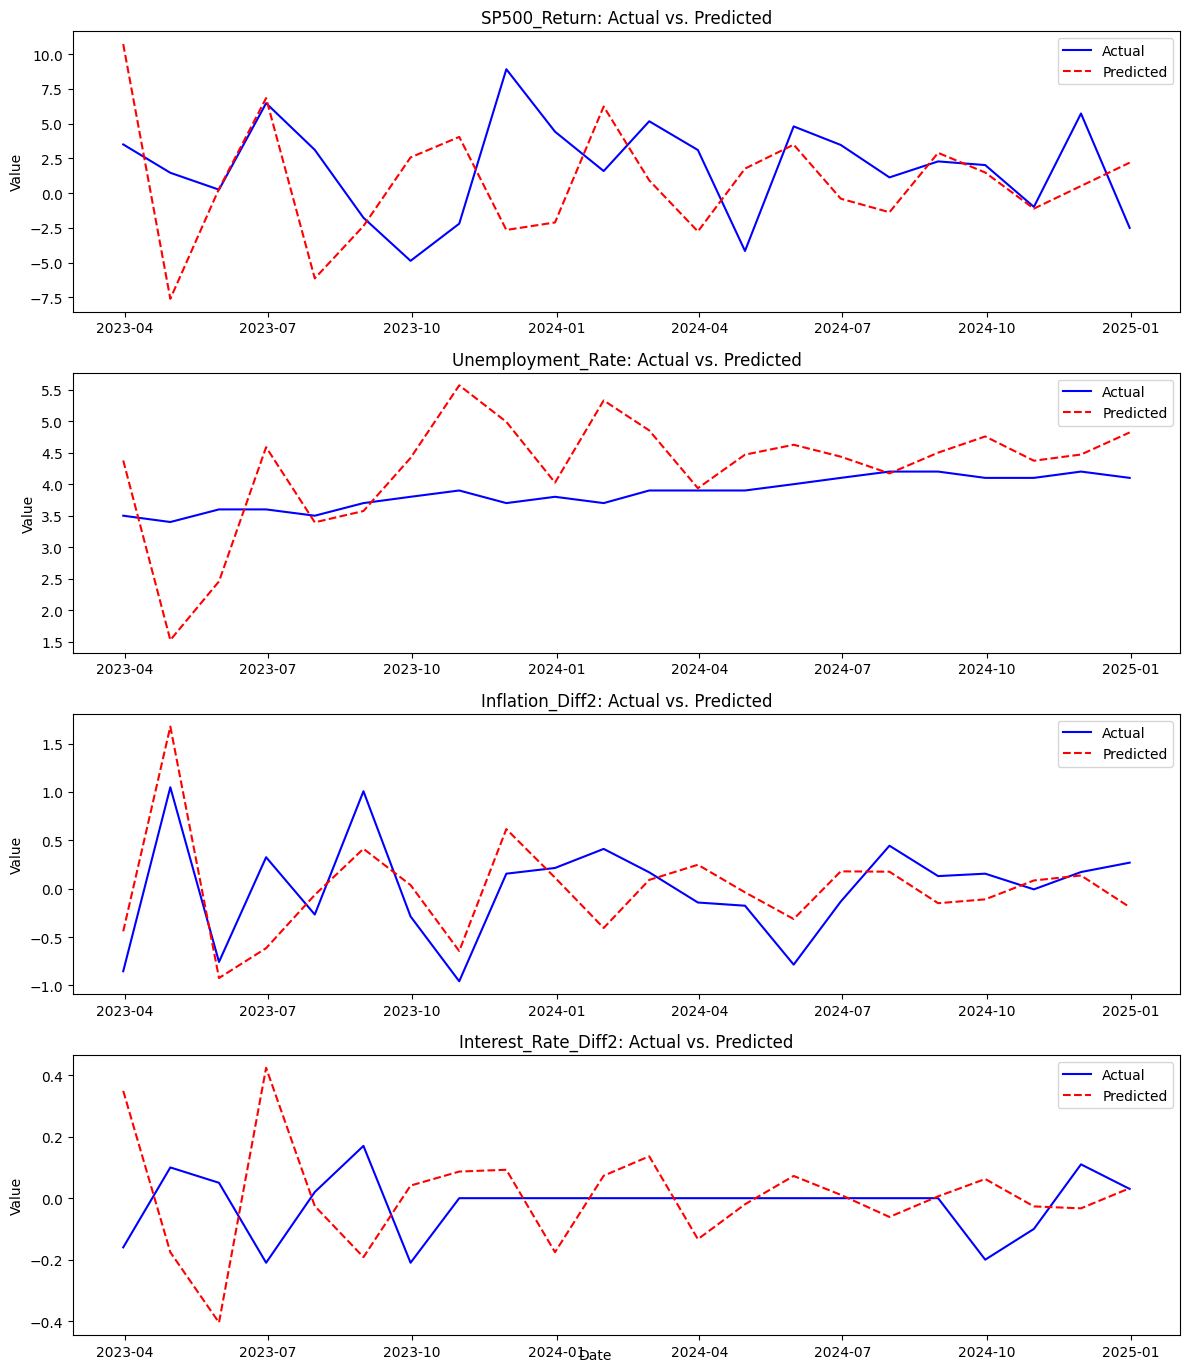

In [ ]:
# Create a single figure and a set of subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 15))

# List of series to plot
series_to_plot = ['SP500_Return', 'Unemployment_Rate', 'Inflation_Diff2', 'Interest_Rate_Diff2']

# Plot each series
for i, series_name in enumerate(series_to_plot):
    axes[i].plot(actual_values_df.index, actual_values_df[series_name], label='Actual', color='blue')
    axes[i].plot(predictions_df.index, predictions_df[series_name], label='Predicted', color='red', linestyle='--')
    axes[i].set_title(f'{series_name}: Actual vs. Predicted')
    axes[i].set_ylabel('Value') # Generic label, specific labels could be added if needed
    axes[i].legend()

# Set a shared x-axis label
fig.text(0.5, 0.04, 'Date', ha='center')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for shared x-label

# Display the plots
plt.show()

## Summary:

### Data Analysis Key Findings

1. Optimal Lag Order:

We used information criteria (AIC and BIC) to select the optimal number of lags for the VAR model. AIC suggested a lag order of 6, while BIC suggested 2. We proceeded with a lag order of 6 based on AIC for the model fitting.

2. Model Coefficients and Significance (from model_fitted.summary()):

The VAR model summary provides coefficients and their statistical significance for each lagged term of each variable in each equation. Looking at the equation for SP500_Return, we can see which lagged values of the macro variables have a statistically significant impact on the current S&P 500 Return. For example, L1.SP500_Return, L1.Interest_Rate_Diff2, L2.SP500_Return, L2.Interest_Rate_Diff2, L3.SP500_Return, L3.Interest_Rate_Diff2, L4.SP500_Return, L4.Unemployment_Rate, L4.Interest_Rate_Diff2, L5.SP500_Return, and L5.Interest_Rate_Diff2, L6.SP500_Return show significant coefficients, indicating that past values of S&P 500 Return, Interest Rate Change (Diff2), and Unemployment Rate have predictive power for current S&P 500 Return. We can also see the direction of the relationship (positive or negative) based on the sign of the coefficients. For example, past interest rate changes (Interest_Rate_Diff2) appear to have a negative relationship with current S&P 500 Return.

3. Granger Causality Tests:

The Granger causality tests formally assess whether the past values of one variable are statistically significant in forecasting another variable.
Unemployment_Rate -> SP500_Return: The tests showed significant evidence that Unemployment Rate Granger-causes SP500 Return, particularly at lags 1 and 2. This suggests that past unemployment rates can help predict future S&P 500 returns.
Inflation_Diff2 -> SP500_Return: The tests indicated that the second difference of Inflation Granger-causes SP500 Return at lags 2, 3, and 4. This suggests that past changes in the rate of inflation can also help predict future S&P 500 returns.
Interest_Rate_Diff2 -> SP500_Return: The tests provided significant evidence that the second difference of Interest Rate Granger-causes SP500 Return at lag 1 and lags 5, and 6. This indicates that past changes in the interest rate have predictive power for future S&P 500 returns.

4. Impulse Response Functions (IRFs):

The IRF plots (which you can visualize using the code provided previously) show the dynamic impact of a one-standard-deviation shock to one variable on the other variables over several periods. By examining these plots, you can see how a shock to, say, Interest Rate Change, propagates through the system and affects Inflation Change, Unemployment Rate, and S&P 500 Return over subsequent months. This provides a visual representation of the interdependencies identified by the VAR model and Granger causality tests.

5. Model Performance (RMSE and MAE):

The evaluation metrics (RMSE and MAE) give us an idea of how well the VAR model forecasts the test set for each variable.
SP500_Return - RMSE: 5.5320, MAE: 4.4502
Unemployment_Rate - RMSE: 0.8797, MAE: 0.6955
Inflation_Diff2 - RMSE: 0.4211, MAE: 0.3522
Interest_Rate_Diff2 - RMSE: 0.2461, MAE: 0.1764
These metrics are in the units of the respective series (percentages for returns and rates, index points for inflation difference). Lower values for RMSE and MAE indicate better forecasting performance. We can see that the model performs relatively better in forecasting the differenced macro variables compared to the SP500 Return.
Overall Insights:

The VAR model analysis suggests that macroeconomic factors (Unemployment Rate, Inflation Change, and Interest Rate Change) do have a statistically significant predictive relationship with S&P 500 Returns within this multivariate framework. The Granger causality tests support this, indicating that these macro variables can help forecast S&P 500 Returns. The Impulse Response Functions provide a visual way to understand the dynamic nature of these relationships.

While the model captures some of the dynamics, the forecasting performance for SP500 Return could potentially be improved, as indicated by the RMSE and MAE values relative to the scale of the returns. Further model refinement or the inclusion of other relevant variables could be considered for improving forecasting accuracy.